# Data Visualisation

Heel veel informatie over hoe je visualisatie kan doen met behulp van matplotlib kan je vinden op deze website: https://www.python-graph-gallery.com/.
Specifiek voor pandas vind je ook op [deze](https://pandas.pydata.org/pandas-docs/stable/visualization.html) pagina veel informatie.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


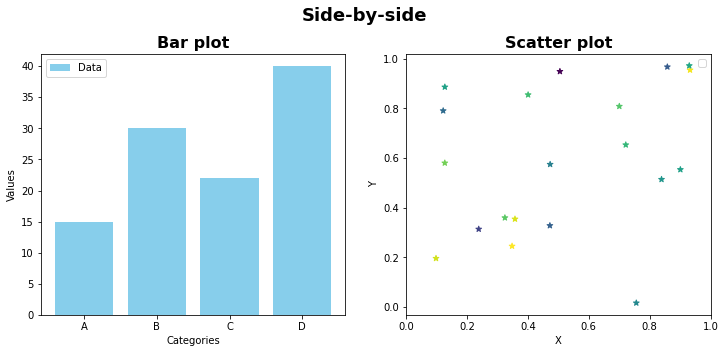

In [14]:
categories = ['A', 'B', 'C', 'D']
bar_data = [15,30,22,40]

x_scatter = np.random.rand(20)  # 20 willekeurige getalletjes tussen 0 en 1
y_scatter = np.random.rand(20)
scatter_colors= np.random.rand(20)
scatter_markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h', 'H']

# grid van 2 figuren (1 rij, 2 kolommen)
# fig is eigenlijk de algemene referentie naar de gehele figuur met twee assenstelsels
# hier zijn deze stelstels ax1 en ax2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# fig, axs = plt.subplots(1, 2, figsize=(12, 5))   # axs is een rij van de assenstelsels

# plot op de eerste axes/grafiek
# x-as categories, y-as bar_data
ax1.bar(categories, bar_data, color='skyblue', label='Data')
ax1.set_title('Bar plot', fontsize=16, fontweight='bold')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Values')
ax1.legend()        # legende wordt standaard automatisch aangevuld, je kan hier dingen weglaten of hernoemen

#plot op de tweede grafiek
sc = ax2.scatter(x_scatter, y_scatter, c=scatter_colors, marker=scatter_markers[-3])
ax2.set_title('Scatter plot', fontsize=16, fontweight='bold')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()  

# voeg een titel toe voor alle figuren
fig.suptitle('Side-by-side', fontsize=18, fontweight="bold")
fig.subplots_adjust(top=0.85)   # iets meer marge (verticaal) tussen titel van de figuur en titel van de grafieken

ax2.set_xticks(np.arange(0, 1.1, 0.2))
ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])    # dit is meer manueel gedaan

#ax2.set_yticks([10, 100, 1000, ...])    # dit is meer manueel gedaan

## Relative to reference point

### Bar diverging

Maak deze figuur zo goed mogelijk na:

![bar diverging plot](plot1.png)


Tips:
* Plotting function hlines
* Kleuren van de balken kan je instellen met het color argument
* De axes van een plot kan je ook opvragen met de gca() functie.
* De lijnen in de plot (de grid) kan je aanpassen met de plt.grid() functie
* De kader van het assenstelsel aanpassen kan je doen door de spines van het assenstelsel aan te passen.

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


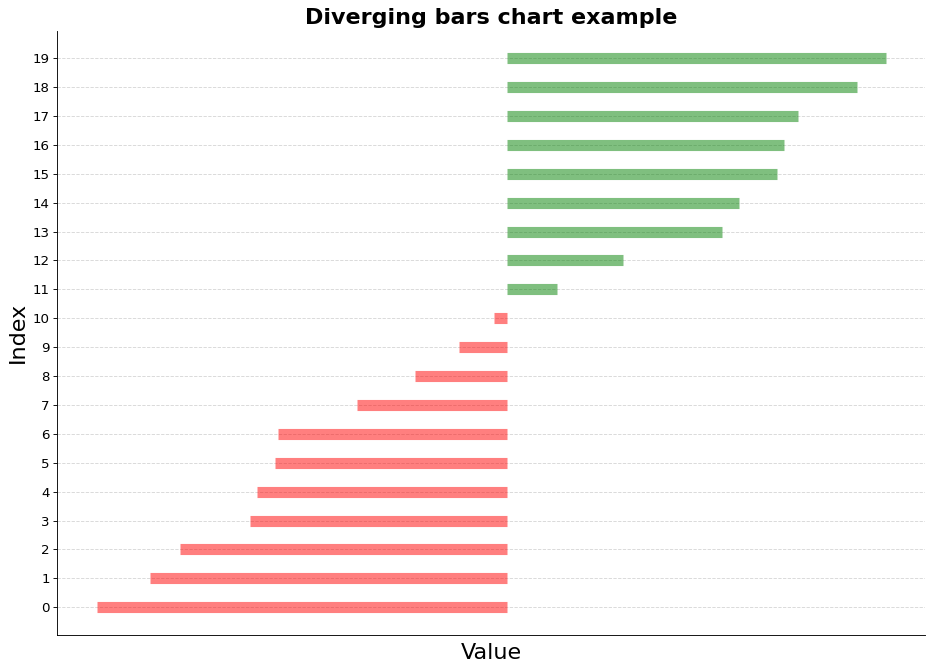

In [29]:
# aanmaken van data
df = pd.DataFrame({"data":np.random.random(size=20)*30+5}) # create random dataframe between 5 and 35
df.sort_values("data", inplace = True) # sorteer by value
df.reset_index(inplace=True) # reset index to ensure index not sorted
df

# hier slaan we de figuur en axes niet op, maar plot werkt steeds op de laatst aangemaakte ook
plt.figure(figsize=(14,10), dpi=80) # dpi is dots per inch, indicatie van de kwaliteit
#plt.hlines(y=df.index, xmin=20, xmax=df.data)       # xmin is het centrum punt (bvb het gemiddelde), xmax moet niet groter zijn dan het min
#plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10)        # maak de balkjes dikker

colors=['red' if float(x) < 20 else 'green' for x in df['data']]
print(colors)
#plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10, colors=colors)

plt.hlines(y=df.index, xmin=20, xmax=df.data, linewidth=10, colors=colors, alpha=0.5)

plt.title('Diverging bars chart example', fontdict={'size': 20, 'weight':'bold'} )
plt.gca().set_xlabel('Value', fontsize=20)   # gca get chart axis - vraag je het assenstelsel (de axis) op
plt.gca().set_ylabel('Index', fontsize=20)

# aanpassen van de ticks (x-as weg en y-as per 1)
plt.xticks([])
plt.yticks(df.index, df.index, fontsize=12)      # tick 1 (eerste df.index) -> label 1 (tweede df.index)

# grid aanpassen, zodat er stippellijntjes zijn per tick op de y-as
plt.grid(linestyle='--', alpha=0.5)

# doe de rechter en bovenrand weg (spines, en die zijn deel van het assenstelsel)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Bar diverging stacked

Je kan ook verschillende balken op dezelfde figuur plaatsen.
Maak nu door gebruik te maken van de barh functie onderstaande figuur zo goed mogelijk na.

![Oef2](plot2.png)

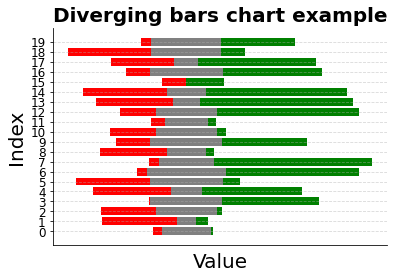

In [38]:
df = pd.DataFrame({"positive":np.random.randint(0,100, size=20),
                  "neutral": np.random.randint(0,50, size=20),
                  "negative": np.random.randint(0,50, size=20)}) # create random dataframe
df

# dit kan met de hlines
# maar ook met de barh (horizontal barplot)
plt.barh(df.index, -df.negative, left=-df.neutral/2, color='red')   # met left schuif je de bar plot de helft van neutral op naar links (xmin van hlines gelijkaardig aan de left hier)
plt.barh(df.index, df.neutral, left=-df.neutral/2, color='gray')
plt.barh(df.index, df.positive, left = df.neutral/2, color='green')


plt.title('Diverging bars chart example', fontdict={'size': 20, 'weight':'bold'} )
plt.gca().set_xlabel('Value', fontsize=20)   # gca get chart axis - vraag je het assenstelsel (de axis) op
plt.gca().set_ylabel('Index', fontsize=20)

# aanpassen van de ticks (x-as weg en y-as per 1)
plt.xticks([])
plt.yticks(df.index, df.index, fontsize=12)      # tick 1 (eerste df.index) -> label 1 (tweede df.index)

# grid aanpassen, zodat er stippellijntjes zijn per tick op de y-as
plt.grid(linestyle='--', alpha=0.5)

# doe de rechter en bovenrand weg (spines, en die zijn deel van het assenstelsel)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Line Surplus Deficit Filled

Ook is het mogelijk om gebieden op te vullen met de **fill_between functie**.

Maak door gebruik te maken van bovenstaande functie, onderstaande figuur zo goed mogelijk na.

![plot3](plot3.png)

Tips: 
* subplots
* fill_between

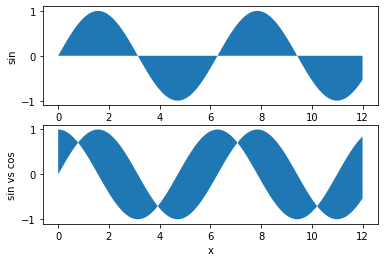

In [43]:
df = pd.DataFrame({"x": np.linspace(0, 12, 100)})
df["sin"] = np.sin(df.x)
df["cos"] = np.cos(df.x)
df

fig, (ax1, ax2) = plt.subplots(2, 1)    # 2 rijen, 1 kolom
ax1.fill_between(df.x, 0, df.sin)       # fill_between: kleur het gebied tussen de twee waarden (0 en df.sin) in
ax2.fill_between(df.x, df.sin, df.cos)

ax1.set_ylabel('sin')
ax2.set_ylabel('sin vs cos')
ax2.set_xlabel('x')

fig.savefig('test.png')     # bewaar het figuurtje

## Verband tussen features

### Scatter plot

Reeds veel gedaan dus ga ik hier niet opnieuw tonen

### Line Column Plot

Nu gaan we kijken om te werken met twee assenstelsels.
Dit kan je doen door gebruik te maken van de **twinx()** functie. Zo krijg je een links en rechtse y-as die elk een aparte schaal kunnen hebben.
Maak hiervoor onderstaande figuur zo goed mogelijk na.

![plot4 - line column plot](plot4.png)

Text(0, 0.5, 'Square')

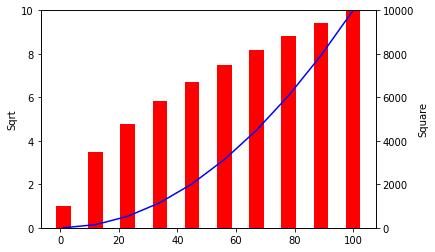

In [50]:
df = pd.DataFrame({"x": np.linspace(1, 100, 10)})
df["square"] = df.x * df.x
df["sqrt"] = np.sqrt(df.x)
df

# de rode balkjes
plt.figure()
plt.ylim(0, 10)     # begrens de linkse y-as
plt.bar(df.x, df.sqrt, 5, color='red')
plt.ylabel('Sqrt')

# de blauwe lijn
ax2 = plt.twinx()     # twinx -> maak een tweede as op de figuur
ax2.plot(df.x, df.square, color='blue', label='square')
ax2.set_ylim(0, 10000)
ax2.set_ylabel('Square')

### Connected scatter plot

Om een geconnecteede scatter plot te maken zijn er twee paden die je kan volgen.
* Ofwel zorg je ervoor dat je zowel een line plot als een scatter plot tekend waardoor de punten aangegeven worden. Let op dat hierbij de data in de juiste volgorde moet staan
* Ofwel gebruik je markers in de line-plot om de datapunten aan te geven. Zie [hier](https://matplotlib.org/stable/api/markers_api.html) voor meer info

Kies een methode en maak onderstaande figuur zo goed mogelijk na

![connected scatter plot](plot5.png)

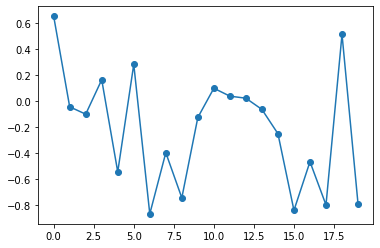

In [55]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df

plt.figure()
plt.scatter(df.x, df.y) # enkel de bolletjes
plt.plot(df.x, df.y)    # de lijn die ze verbindt

### Bubble plot

Een bubble plot kan je maken door de **size** parameter van een scatter plot te laten afhangen van een aparte rij.

Oefen dit door deze figuur zo goed mogelijk na te maken:

![bubble plot](plot6.png)

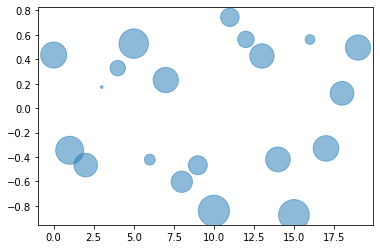

In [61]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y"] = np.random.random(size=20) * 2 -1
df["size"] = np.random.random(size=20) * 1000
df

plt.scatter("x", "y", s='size', alpha=0.5, data=df)     # geef de kolomnamen weer als x-waarde (x), y-waarde (y) en s voor de size van de bol (size)

### XY - heatmap

Dit hebben we ook reeds gedaan bij de correlatie matrices, die ga ik nu niet overdoen. Binnen maptlotlib kan dit met matshow. Seaborn heeft een alternatief dat [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) noemt.

## Plots voor verbanden met de tijd

### (Stacked) Area plot

Met behulp van de stackplot functie kan je verschillende plots boven elkaar leggen.
Oefen dit door onderstaande figuur zo goed mogelijk na te bouwen

![plot 7](plot7.png)

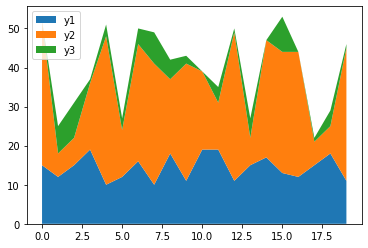

In [68]:
df = pd.DataFrame({"x": np.arange(0, 20)})
df["y1"] = np.random.randint(10, 20, size=20)
df["y2"] = np.random.randint(5, 40, size=20)
df["y3"] = np.random.randint(0, 10, size=20)
df

# dit kan je doen met de stackplot functie
plt.stackplot(df.x, df.y1, df.y2, df.y3, labels=["y1", "y2", "y3"])
plt.legend(loc="upper left")

### Fan plot

Een andere belangrijke plot is een fan plot. Deze kan bijvoorbeeld gebruikt worden om fouten op voorspellingen aan te geven.
Hiervoor moet er vanaf een bepaald punt (het punt waarop de voorspellingen beginnen) een area opgevuld worden om de mogelijke fout aan te geven.

Om dit in te oefenen, maak onderstaande figuur na
De meeste functies hiervoor heb je reeds gezien. Enkel voor de grijze zone na te bootsen kan je gebruik maken van axvspan()

![plot 8](plot8.png)

In [69]:
df = pd.DataFrame({"x": np.arange(0, 50)})
df["y"] = np.random.randint(10, 100, size=50)
# voor een fan-plot ga je eerst error-waarden moeten berekenen 
df_errors=df.tail(10).copy()
df_errors["error1"] = 50 * 0.2 * (df_errors.x - df_errors.x.min()) / len(df_errors) # (df_errors.x - df_errors.x.min()) / len(df_errors) (hoever van start tot einde van interval waar fouten in staan)

### Circles Timeline Plot

Dit kan gegenereerd worden door middel van een scatter plot waar de x-as de tijd is (of een index), de y waarde is een constante (bijvoorbeeld 0) en de bubble size is dan de bijhorende waarde

Probeer dit zelf eens uit met onderstaande data om deze figuur zo goed mogelijk na te maken

![plot 9](plot9.png)

In [53]:
df = pd.DataFrame({"x": np.arange(0, 20)})


,x,y1,y2
0,0,1286.316640,1051.050554
1,1,1352.796716,1596.349648
2,2,729.415721,1051.627316
3,3,1453.977672,1442.871056
4,4,1318.326347,1001.707007
5,5,510.966569,1774.198317
6,6,1122.001915,953.037804
7,7,808.892678,191.516350
8,8,1178.203965,1584.208584
9,9,854.441596,1913.513421


### Seismogram plot

Dit kan opnieuw gedaan worden op basis van de vorige voorbeelden. Zoals bij het Connected scatter plot er twee zaken geplot zijn op 1 figuur met dezelfde y-as moeten er hier twee lijn plots zijn. De ene bevat de exacte waarden en de andere een lijn dat de toppen van de golven verbindt. 

Het moeilijke is om de lokale maxima/minima te zoeken die verbonden moet worden. Dit kan eventueel zelf gedaan worden of je kan gebruik maken van een package die dit doet voor jou, bijvoorbeeld: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html of https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

## Sorteren / Volgorde van data

### Lollipop chart

Hiervoor kan je de stem functie gebruiken. Meer informatie over deze functie kan je vinden op [deze website](https://www.python-graph-gallery.com/lollipop-plot/)
Deze kan je inoefenen door onderstaande figuur na te bootsen

![plot 10](plot10.png)

<StemContainer object of 3 artists>

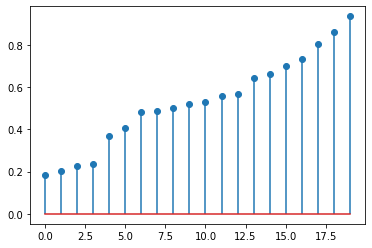

In [55]:
df = pd.DataFrame({'x':range(20), 'y':np.random.uniform(size=20) })

### Bump plot

Dit kan gedaan worden als connected scatter plot (1 per lijn). Je moet dan wel nog extra aandacht besteden aan de y-ticks die de startvolgorde van de verschillende lijnen bepaalt. Het maken van aparte ticks links en rechts voor het veranderen van de volgorde kan door gebruik te maken van de twinx functie (zie de line-column plot).